# CS110 Final Assignment
## Automated Sentence Generation using Dictionary and Hashing 

For this assignment, I will create a simple autocomplete bot that generates sentences. The bot will take an initial string with n number of words as well as a word count parameter wordcount and produce a text with the given word count. The motivation for this project is the fact that autogenerated texts can be used in a variety of fields, from fillers to SEO rank boosting content. In addition to that, many applications use autocompletion to help people type faster by suggesting the most relevant word in a given context.

We will use Python dictionary and custom hash tables because these data structures are highly relevant for our purpose. They allow an easy, fast, and efficient mapping between keys and values. For a dictionary, a single mapping takes $O(1)$ time, and finding a value given the key also takes $O(1)$ time. Which is great, since our generator is going to constantly and iteratively find values given a key. I looked into the resource provided by prof. Ribeiro in my proposal feedback, and concluded that my algorithm is very much similar to an n-gram model. In this case, we will have a prefix (two words) as a key and a list of words as a value. For any given prefix, the algorithm will find the appropriate slot where the key is the prefix and then will access the value, which is a list. Inside this list is the pool of all the words that appeared after the given prefix in our original text ("The World as Will and Representation" by Arthur Schopenhauer). The algorithm will randomly take a word from the list and add it to our generated text. Since the sampling is done randomly, the words that appeared more in the original text have higher chances of being sampled; therefore, more relevant words will be suggested for a given prefix. 

<br>
We will need to define some criteria for our context to decide which algorithmic solution is better. 
The first criterion will be time complexity. We want to find a solution that is fast, and the runtime does not grow at a high rate as the input (a word bank with n number of words) increases. This is very important since n-grams can take up a lot of space and time to store all the data if the given original text is too large.
The second criterion will be the syntax. We want the generated text to be somewhat "good," meaning, syntactically, somewhat correct. We will consider an output text good if any given pair of words is syntactically correct. Meaning the sentence "this is the suffering which is merely known" is a good sentence since if we take any two consecutive words (i.e., "this is" or " merely known"), the resulting phrase is acceptable. On the other hand, "this is the the suffering which is merely known" is not a good sentence since "the the" is not correct.   

<br>

I will also put a lot of focus on using Python classes for this assignment. Firstly, I want to improve my OOP skills and get more used to working with classes and class objects. The second reason is that the bot can be further improved, and new features can be added (which I will also discuss later). Having a Generator and Hashtable classes makes it easier to expand on the existing features and add new attributes/methods that can interact with the existing ones or use the existing features. Furthermore, we might want to have several different hashtable or generator instances, and having a class makes it extremely easy to create such instances with a single line of code.

## Part I: Creating the generator with a Python Dictionary

The text we will use as a word bank resource for our generator is the first volume of "The World as Will and Representation" by Arthur Schopenhauer. We should note that this doesn't just serve as a word bank but also somewhat as a blueprint for syntactic structure. 

In [1]:
import numpy as np

mainfile = open('schopenhauer.txt', encoding = 'utf8').read()
word_bank = mainfile.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace('_',"").replace("—","").lower().split()

In [2]:
class Generator():
    """
    This is a text generator class that uses built-in python dictionary 
    to generate text.
    
    
    methods:
    ----------
    generate_text(self, startpoint, wordcount)
    Takes an initial string as a startpoint and continues untill reaching the given wordcount limit
    
    """
    
    def __init__(self, wordbank):
        """
            Transfers the list into a dictionary structure.
            
            input
            ----------
            wordbank: a list of words that will be used as a resource for the generator to pull appropriate words from.

        """
        
        # Initializing the dictionary
        self.text_dict = {}
         
        # Iterates through the entire word bank taking a pair of words as a key and a third word as a value
        for i in range(len(wordbank)-2):
            word1 = word_bank[i]
            word2 = word_bank[i+1]
            word3 = word_bank[i+2]
            
            # If the word pair exists as a key, append the third word to the value list
            if self.text_dict.get((word1, word2)):
                self.text_dict[(word1,word2)].append(word3)
                
            # Otherwise, initialize a new list for the new pair
            else:
                self.text_dict[(word1, word2)] = [word3]
    
    def generate_text(self, startpoint, wordcount):
        """        
            Takes an initial string as a startpoint and continues untill reaching the given wordcount limit
            
            input
            ----------
            wordbank: a list of words that will be used as a resource for the generator to pull appropriate words from.
            
            output
            ----------
            text with the given beginning and given number of words.

        """
        # Print the startponit and get the last two words
        sentence = [(startpoint.split()[-2], startpoint.split()[-1])]
        
        
        continuation = ''
        
        # Take the last tuple of words and generate the third word from the appropriate pool
        for i in range(wordcount):
            lastword = sentence[-1]
            try:
                newword = np.random.choice(self.text_dict[lastword])
            except:
                newword = np.random.choice(self.text_dict[("the","world")])
            continuation += newword + " "
            newword= lastword[1:] + (newword,)
            sentence.append(newword)
        
        return startpoint + ' ' + continuation
 

In [3]:
gen = Generator(word_bank)
gen.generate_text("this is", 100)

'this is the commonest caseor else it becomes a merely natural being he can give from mere egoism as from another point of view it is supposed to have been the dependence which we might now awaken this conviction much more distinctly when we consider only its phenomena is thus in proportion as knowledge attains to that infinite clinging to life cannot be attained we thus escape in the form of a dagger or of the will in the particular case as the complete assertion of will therefore the anguish of conscience more fully later on and raise its concept denoted by '

As we can see, the generator works fine for an average input. We will do two more tests with some edge cases, such as having words that are not in the word bank or having a very large initial input.

In [4]:
# For a nonexistent tuple, our program will consider "the world" as a default string

test1 = Generator(word_bank)
test1.generate_text("nonexistent word tuple, like fantastic beast", 50) 

'nonexistent word tuple, like fantastic beast necessarily exists and progressively develops in accordance with my will to live on at ease as if he now applies himself to his stoic philosophers who taught διδακτην ειναι την αρετην (doceri posse virtutem) from without but if we succeed which is of equal value with the nature of man '

In [5]:
# The algorithm should handle long inputs and large wordcount numbers 

test2 = Generator(word_bank)
test2.generate_text('this is indeed only the manifestation of a few is the refined silver of the will to live for no one can have lasting peace upon earth we therefore see the end of a whole world which once were able to move and agonise his spirit also but which now stand before him as utterly indifferent to him but only then i say is this knowledge sufficient to bring about the denial of the will to live and with inward earnestness and no desire for revenge indeed their sufferings and death at last they see the histories of the will to live .', 500)

'this is indeed only the manifestation of a few is the refined silver of the will to live for no one can have lasting peace upon earth we therefore see the end of a whole world which once were able to move and agonise his spirit also but which now stand before him as utterly indifferent to him but only then i say is this knowledge sufficient to bring about the denial of the will to live and with inward earnestness and no desire for revenge indeed their sufferings and death at last they see the histories of the will to live . as itself and in consequence of and in isolation would be so small that the intellect towards the aims of his will instead of right because he shuts himself out from all law and we can calculate an eclipse of the will is simply this willing itself which is founded the moral lawfulness and validity of the possession on his knowing them although they seem to be an error and spinoza according to the highest degree in which the individual character which is expressed i

## Part II: Creating our own HashTable Class
Now we will create our own HashTable and use it to implement our generator.

In [132]:
class CustomHashTable():
    """
    This is a custom hash table class that uses a single hash function and chain hashing 
    to store elements of text in appropriate places.
    
    
    methods:
    ----------
    insert(self, prefix, word)
    Turns the prefix into a key and the word into a value and stores them.
    
    hashfunction(prefix)
    Maps the given prefix into a hash_key that is used as an index in the hash map.
    
    """
    def __init__(self):
        """
        Initializing the hash table
        
        attributes
        ------------
        self.size
        The size of the hashtable
        
        self.hashtable
        Empty hashtable initialized
        
        """
        
        self.size = 50000
        self.hashtable = [[] for i in range(self.size)] 
    
    def insert(self, prefix, word):
        """
        Turns the prefix into a key and the word into a value and stores them.
        
        """
        # Decomposing the tuple into a string with no space between the words
        key = f"{prefix[0]}{prefix[1]}" 
        
        # Passing the string into the hashfuntion
        hash_key = self.hashfunction(prefix)
        
        # Using the hashfunction to store the 3rd word
        self.hashtable[hash_key].append(word) 

    def hashfunction(self, prefix):
        """
        Maps the given prefix into a hash_key that is used as an index in the hash map.
        
        """
        
        # This hashfunction was taken from our class
        key = 0
        combo = f"{prefix[0]}{prefix[1]}"
        for char in combo:
            key = key * 211 + ord(char)
        return key % self.size



In [133]:
class Generator_Custom():
    """
    This is a text generator class that uses our custom hash table class to generate text.
    
    
    methods:
    ----------
    generate_text(self, startpoint, wordcount)
    Takes an initial string as a startpoint and continues untill reaching the given wordcount limit
    
    """
    def __init__(self, wordbank):
        """
            Transfers the list into a hash table structure.
            
            input
            ----------
            wordbank: a list of words that will be used as a resource for the generator to pull appropriate words from.

        """
        
        # Initializes the Custom HashTable instance
        self.custom_text_dict = CustomHashTable()
        for i in range(len(wordbank)-2):
            
            # Isolate 3 words where the first two are a key and the 3rd one is the value
            word1 = word_bank[i]
            word2 = word_bank[i+1]
            word3 = word_bank[i+2]
            
            # Add the value to the list of that key
            self.custom_text_dict.insert((word1, word2), word3)
    
    
    def generate_text(self, startpoint, wordcount):
        """
        Takes an initial string as a startpoint and continues untill reaching the given wordcount limit
            
        input
        ----------
        wordbank: a list of words that will be used as a resource for the generator to pull appropriate words from.

        output
        ----------
        text with the given beginning and given number of words.
        
        """
        # Print the sentence and take the last two words for the generator
        sentence = [(startpoint.split()[-2], startpoint.split()[-1])]
        continuation = ''
        
        # Using the two words, pull an appropriate word from the pull and generate text
        for i in range(wordcount):
            lastword = sentence[-1]
            try:
                newword = np.random.choice(self.custom_text_dict.hashtable[self.custom_text_dict.hashfunction(lastword)])
            except:
                newword = np.random.choice(self.custom_text_dict.hashtable[self.custom_text_dict.hashfunction(("the", "world"))])
            continuation += newword + " "
            newword= lastword[1:] + (newword,)
            sentence.append(newword)
        return startpoint + ' ' + continuation



In [134]:
custom_gen = Generator_Custom(word_bank)
custom_gen.generate_text('this is the', 100)

'this is the essential form of all codes of law: “wise men who lived in them the colours which the motives on account of the plant there is no security for him and is really so the more intelligence aim which do which as far as is shown in the same thing as making in counteraction is predominates as a rule his knowledge he must then unceasingly bring offerings prayers temple decorations vows and their he in is it with the complete certainty it as against other universal calamities for this depends on his gods for help and support of them must always '

As we can see, the hashtable works fine. However, will it work for some edge cases?

In [135]:
# For a nonexistent tuple, our program will consider "the world" as a default string

custom_test1 = Generator_Custom(word_bank)
custom_test1.generate_text("nonexistent word tuple, like fantastic beast", 50) 

'nonexistent word tuple, like fantastic beast predominates resistance and is distinctly and also in the first need because when accidents and a fortiori by deceiving his oppressor whoever cannot labour the itself predominates of of ie exists and progressively develops in accordance with his possessions to have been given and as we have also of judging '

In [136]:
# The algorithm should handle long inputs and large wordcount numbers 

custom_test2 = Generator_Custom(word_bank)
custom_test2.generate_text('this is indeed only the manifestation of a few is the refined silver of the will to live for no one can have lasting peace upon earth we therefore see the end of a whole world which once were able to move and agonise his spirit also but which now stand before him as utterly indifferent to him but only then i say is this knowledge sufficient to bring about the denial of the will to live and with inward earnestness and no desire for revenge indeed their sufferings and death at last they see the histories of the will to live .', 500)

'this is indeed only the manifestation of a few is the refined silver of the will to live for no one can have lasting peace upon earth we therefore see the end of a whole world which once were able to move and agonise his spirit also but which now stand before him as utterly indifferent to him but only then i say is this knowledge sufficient to bring about the denial of the will to live and with inward earnestness and no desire for revenge indeed their sufferings and death at last they see the histories of the will to live . but in the same thing happens necessity we than as is the only means of diverting the mind of his intellect without a definite tendency which exhibits itself for experience in it so is the original and positive and the latter by they and and to weep rejoice enjoy and it is so wretched that and which is the great majority that as such cannot continue the poet always finds that it should lie and of his simile of the will and to what one’s as each and never positive i

Although the algorithm successfully generates text, I am not very happy with its' performance. If we pay attention we can see that our generator with custom hash table makes more syntactic mistakes than the one with dictionary. This is because we have a limited number of slots and words that follow different tuples are in the same slot. Which means that in a short time our generator creates a pair of words that did not exist in the original text (therefore higher chances of mistakes). Furthermore, if we did not have the try and except handler, our code would very quickly crash since it would face a tuple of words that does not exist in the original text. We can fix this by creating slots inside a slot and putting a given 3rd word into the sublist of the appropriate prefix. We will create the second CustomHashTable, which will have these improvements.

In [212]:
class CustomHashTable2():
    """
    This is a custom hash table class that uses a single hash function and tuples to store prefixes and their continuation words. 
    
    
    methods:
    ----------
    insert(self, prefix, word)
    Turns the prefix into a key and the word into a value and stores them in a location given by the hash function.
    
    find(self, prefix)
    finds the list of words thaht follow a given prefix
    
    hashfunction(prefix)
    Maps the given prefix into a hash_key that is used as an index in the hash map.
    
    """
    def __init__(self):
        """
        Initializing the hash table
        
        attributes
        ------------
        self.size
        The size of the hashtable
        
        self.hashtable
        Empty hashtable initialized
        
        """
        
        self.size = 50000
        self.hashtable = [[] for i in range(self.size)]
    
    def insert(self, prefix, word):
        """
        Turns the prefix into a key and the word into a value and stores them.
        
        """
        # Turn the tuple into a single string
        key = f"{prefix[0]}{prefix[1]}"
        
        # Get a location for that string using the hash function
        hash_key = self.hashfunction(prefix)
        
        # Check if the string already exists as a key in a tuple inside the list
        for tup in self.hashtable[hash_key]:
            # If it's there, just append the word to the list of words that follow that prefix and return
            if key in tup:
                tup[1].append(word)
                return   
            
        # Otherwise create such a tuple in the given location
        self.hashtable[hash_key].append((key, [word])) 
    
    def find(self, prefix):
        """
        Finds the list of words that follow the given prefix.
        Returns a list.
        
        """
        
        # Turn the prefix into a string key
        key = f"{prefix[0]}{prefix[1]}"
        
        # Find the appropriate slot of that string using the hashfunction
        hash_key = self.hashfunction(prefix)
        
        # Search inside the slot for the specific sub-slot where the key is with the list of values
        for tup in self.hashtable[hash_key]:
            if key in tup:
                
                # Return the list of values (the second element in the tuple)
                return tup[1]  

    def hashfunction(self, prefix):
        """
        Maps the given prefix into a hash_key that is used as an index in the hash map.
        
        """
        
        key = 0
        combo = f"{prefix[0]}{prefix[1]}"
        for char in combo:
            key = key * 211 + ord(char) 
        return key % self.size 



In [213]:
class Generator_Custom2():
    """
    This is a text generator class that uses our new, improved custom hash table class to generate text.
    
    
    methods:
    ----------
    generate_text(self, startpoint, wordcount)
    Takes an initial string as a startpoint and continues untill reaching the given wordcount limit
    
    """
    def __init__(self, wordbank):
        
        self.custom_text_dict = CustomHashTable2()
        for i in range(len(wordbank)-2):
            word1 = word_bank[i]
            word2 = word_bank[i+1]
            word3 = word_bank[i+2]
            
            # Since our new hashtable already does the checkup for us, all we need to do is call the insert method.
            self.custom_text_dict.insert((word1, word2), word3)
    
    def generate_text(self, startpoint, wordcount):
        sentence = [(startpoint.split()[-2], startpoint.split()[-1])]
        continuation = ''
        
        for i in range(wordcount):
            lastword = sentence[-1]
            
            # Here as well we only need to use the find function and it will return the appropriate list
            try:
                newword = np.random.choice(self.custom_text_dict.find(lastword))
            except:
                newword = np.random.choice(self.custom_text_dict.find(("the", "world")))
            continuation += newword + ' '
            newword= lastword[1:] + (newword,)
            sentence.append(newword)
        return startpoint + ' ' + continuation



In [214]:
custom_gen2 = Generator_Custom2(word_bank)
custom_gen2.generate_text("it is", 100)

'it is the expression of the state and of law i have the most recent part of all that they should be present but merely the thoughtless talk of right because he knows and according as that agreement is more rare and presupposes it it would have done so still more deny the justifiableness of stratagem in war which is itself a manifestation of this myth especially when as soon as this view is also the most part comes presently to be and since we know it not we are indifferent to him in precisely the way explained above on the influence '

Finally, we can once again run our two important tests and see whether the algorithm passess them successfully.

In [215]:
# For a nonexistent tuple, our program will consider "the world" as a default string

custom_test1 = Generator_Custom2(word_bank)
custom_test1.generate_text("nonexistent word tuple, like fantastic beast", 50) 

'nonexistent word tuple, like fantastic beast and and than as which while and in whatever direction one may look and in isolation is preserved like a meteoric stone sprung from an unbearable burden to it altogether for in the life of genius (satwa-guna) thirdly and lastly the greatest lethargy of the will of which the phenomenon '

In [216]:
# The algorithm should handle long inputs and large wordcount numbers 

custom_test2 = Generator_Custom2(word_bank)
custom_test2.generate_text('this is indeed only the manifestation of a few is the refined silver of the will to live for no one can have lasting peace upon earth we therefore see the end of a whole world which once were able to move and agonise his spirit also but which now stand before him as utterly indifferent to him but only then i say is this knowledge sufficient to bring about the denial of the will to live and with inward earnestness and no desire for revenge indeed their sufferings and death at last they see the histories of the will to live .', 500)

'this is indeed only the manifestation of a few is the refined silver of the will to live for no one can have lasting peace upon earth we therefore see the end of a whole world which once were able to move and agonise his spirit also but which now stand before him as utterly indifferent to him but only then i say is this knowledge sufficient to bring about the denial of the will to live and with inward earnestness and no desire for revenge indeed their sufferings and death at last they see the histories of the will to live . has exists the which while in truth the motives are almost always satisfaction at the top where the tangent does not change himself but how often one will easily recognise that the whole of life on the other hand excretion the constant exhalation and throwing off of matter in which this reaches the highest made of its visibility and thus merely indirectly as something belonging to life thus it is not subordinate to the freedom of the species at the fair snatch at e

## Part III: Experimentation and Comparative Analysis

We will first compare our two hash tables and see which one is better for our purpose. Then we will compare the winning hash table class with the python dictionary and point out their differences. 
We can find the load factor by dividing the number of entries in the hashtable by the number of slots that the entries overtake.

In [217]:
# The number of non-empty slots in the first hash table
busy_slots_1 = 0 

# The number of non-empty slots in the second hash table
busy_slots_2 = 0


for slot in custom_gen.custom_text_dict.hashtable:
    if len(slot) > 0:
        busy_slots_1 += 1
        
for slot in custom_gen2.custom_text_dict.hashtable:
    if len(slot) > 0:
        busy_slots_2 += 1

print("Number of non-empty slots in the first hash table: ", busy_slots_1)
print("Number of non-empty slots in the second hash table: ", busy_slots_2)

print("The load factor is:",  (len(word_bank) - 1) / busy_slots_2)

Number of non-empty slots in the first hash table:  14550
Number of non-empty slots in the second hash table:  14550
The load factor is: 2.0738831615120277


We see that for both tables, the load factor is the same (around $2$). This shows us that we are likely to have on average 2 collisions in each slot. One reason why we have such load factor is our hash function. I choose the specific hash function because it can produce a large amounth of unique values. Furthermore, I knew that I was going to concatinate two words into a single string. This means that the shortest possible string in the text would have at least 3 characters (for example "is a" = "isa"), this would imply $26^3$ unique values for a string with length 3. However, we know that the average length of a string will be much longer (about 10-15 characters), which means we will have a very large number of unique keys generated. This lowers the chances of collisions. 
<br>

This is not a very good load factor for us, since it means in every slot, we will have at least one or two prefixes with their pool of words. As a result, our generator that uses the first hash function will make up new word tuples that did not exist in the original text, including ones that we consider syntactically bad. This is why the second hash table is more handy than the first one. Since we cannot escape these collisions, we will try to search inside a slot for the subslot where our desired prefix is. This might take a bit more time, but we are ok with this cost for now since we care about syntax too. (As of now, on average we will make 2 comparisons in a given slot, but we should note that this number grows linearly with the size of word bank input). 

We can now compare the second hash table with a native dictionary.
To do so, we will initiate two generators: one that uses the Custom_Generator2 class and another that uses the Generator class. With initialization, insertion is also done instantly, so we can see how the algorithms perform on insertion.

In [221]:
from timeit import default_timer as timer

# We will check the speed of generating output which is done by the generate_text() method of our generator classes 
# but uses dictionary get and custom hashtable's find methods


final_timings_table_1 = []
final_timings_table_2 = []

wordcounts = [1000, 5000, 10000, 15000]
for w in wordcounts:
    lst = []
    for i in range(100):
        table_1 = None
        start = timer()
        table_1 =  Generator(word_bank[:w])
        dummy_text = table_1.generate_text("it is", 100)
        end = timer()
        time = end - start
        lst.append(time)
    final_average_time = np.mean(lst)
    final_timings_table_1.append(final_average_time)

for w in wordcounts:
    lst = []
    for i in range(100):
        table_2 = None
        start = timer()
        table_2 =  Generator_Custom2(word_bank[:w])
        dummy_text = table_2.generate_text("it is", 100)
        end = timer()
        time = end - start
        lst.append(time)
    final_average_time = np.mean(lst)
    final_timings_table_2.append(final_average_time)

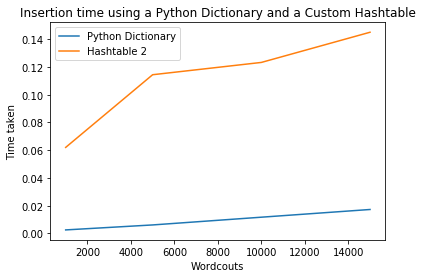

In [222]:
import matplotlib.pyplot as plt

plt.plot(wordcounts, final_timings_table_1, label="Python Dictionary")
plt.plot(wordcounts,final_timings_table_2, label = "Hashtable 2")
plt.title("Insertion time using a Python Dictionary and a Custom Hashtable")
plt.xlabel("Wordcouts")
plt.ylabel("Time taken")
plt.legend()

As we can see, the generator with a built-in python dictionary performs much faster than the one working with the CustomHashTable2 class (not only is it higher, but also seems to have a sharper growth). Let's start by noting that, on average, a python dictionary takes $O(1)$ time to find a value given the key. For our hashmap however, it will take more time since our algorithm finds the slot where the key-value pair is, but then performs a search inside the slot to find the pair since every slot can have more than one key-value pair. Furthermore, our function searches using a simple for loop, which is not the best searching strategy. However, due to the small load factor, we know that the pool of search will be much smaller (for our current input, it will take 2 or 3 comparisons on average). However, we know that the load factor depends on the number of input entries and that they grow linearly. If we assume that on average, for
$N$ entries, $k$ number of slots will become busy, we can interpret our load factor $a$ as $\frac{N}{k}$. Therefore, with a word bank of $N$ words as an input, it will take $O(\frac{1}{k}N)$ time to insert all of those into the table. For Big-O notation, we ignore the coefficient, which means that the complexity will be $O(N)$. Since we do a similar search when using the find() method. The same analysis applies to lookup as well, which also has a time complexity of $O(N)$. 
<br>

This is not a very good performance for a hash table, especially when we know that our first hash table would perform insertion at a constant $O(1)$ speed. However, again, in comparison to Hashtable 1, Hashtable 2 better preserves a good syntax, which in our context is very important. On the other hand, a python dictionary is able to both perform insertion and lookup at a constant time while also preserving the desired syntactic structure. We can also note that the worst case scenario for a built-in Python dictionary is highly unlikely, but if we were to theorise one, the complexity would be $O(N)$ since python dictionaries also use hashmaping.
<br>

We conclude that a native python dictionary wins this "race." It satisfies all of our criteria: it is fast and efficient and produces syntactically good results. However, we were able to get very important insights about how hash tables can be used for our purpose. We also found practical ways of modifying hash tables to accommodate our needs. One thing that I find very interesting is that even a small in-slot search function was able to move the complexity up from constant to $O(N)$, which is amusing and tells a lot about how careful we should be even with small modifications. I have also made several attempts to overcome the linear growth of my second hash table class, which, unfortunately, did not work well enough. One example is my attempt at Cuckoo hashing. The cuckoo hashing could be a good strategy in our case since it would take constant $O(3)$ time for both average and worst-case scenarios since we would store every key-value pair in 3 different locations, and when performing a lookup, we would only look on those 3 locations to find it. The drawback of this strategy was the possibility of having an infinite loop, which I tried to overcome with conditional handling. The reason cuckoo hashing did not work is that the conditional handler affected the quality of the output for edge cases (it would fail to output many valid inputs since there were too many recursions and the handler stopped the function).  

## HC and LO Appendix

*#ComputationalCritique*: First, I defined context-specific criteria which I used throughout the assignment to critique the algorithms. Then I analyzed the performance and efficiency of the algorithm while also discussing the hash function and its efficiency by considering the load factor and the search processes inside the algorithms. Finally, I made two important comparisons: one between the two hashtable classes, and one between the second hash table class and the built in python dictionary. Through experimentation, I showed that a built-in python dictionary outperformed our hash table class in terms of speed and time complexity.

*#DataStructures*: I implemented a dictionary data structure as well as my own Hash Tables. I also explained why hash tables can be good data structure candidates for our purpose and discussed further improvements for my Hash Tables.

*#CodeReadability*: The code has been presented with markdowns and comments. Appropriate variable names were used througout.

*#Responsibility*: My assignment was based on the initial proposal. I carefully looked at the comments made by the professor and tried my best to incorporate all the feedback. 

*#Professionalism*: I followed the given instructions and presented the work in a (hopefully) professional way. I also used grammarly to avoid grammar and spelling mistakes. 